# 1. Import libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# combinations
from itertools import combinations

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data

In [2]:
dataset = pd.read_csv('../results/prepared_data.csv')

# set the column type for column with date
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%Y-%m-%d')

dataset

,Data,BARDO (150160220) Stan wody [cm],BIAŁOBRZEZIE (150160250) Stan wody [cm],BOGDAJ (151170060) Stan wody [cm],BOGDASZOWICE (151160180) Stan wody [cm],BOJANÓW (150180040) Stan wody [cm],BORÓW (150160280) Stan wody [cm],BRANICE (150170170) Stan wody [cm],BRZEG (150170090) Stan wody [cm],BRZEG DOLNY (151160170) Stan wody [cm],...,RUDNA (251160140) Brak pomiaru,STARE OLESNO (250180030) Brak pomiaru,SUKOWICE (250180330) Brak pomiaru,SZALEJÓW GÓRNY (250160840) Brak pomiaru,SZCZAWNO-ZDRÓJ (250160130) Brak pomiaru,TWARDOCICE (251150280) Brak pomiaru,WALIM (250160270) Brak pomiaru,ZIELINA (250170280) Brak pomiaru,ŁABĘDY (250180330) Brak pomiaru,ŁANY (251170420) Brak pomiaru
0,2017-11-01,100.0,57.0,291.0,91.0,64.0,153.0,167.0,251.0,286.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2017-11-02,95.0,55.0,285.0,89.0,64.0,145.0,167.0,239.0,285.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017-11-03,93.0,54.0,290.0,87.0,65.0,139.0,170.0,224.0,258.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2017-11-04,90.0,55.0,296.0,86.0,63.0,136.0,163.0,226.0,218.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2017-11-05,88.0,53.0,291.0,86.0,62.0,133.0,160.0,215.0,244.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-10-27,67.0,50.0,219.0,71.0,55.0,86.0,161.0,175.0,322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2021-10-28,67.0,50.0,221.0,71.0,57.0,86.0,161.0,170.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,2021-10-29,67.0,50.0,219.0,71.0,54.0,85.0,161.0,170.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,2021-10-30,66.0,52.0,215.0,70.0,55.0,86.0,161.0,169.0,316.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Columns: 174 entries, Data to ŁANY (251170420) Brak pomiaru
dtypes: datetime64[ns](1), float64(173)
memory usage: 1.9 MB


In [4]:
hierarchy = pd.read_csv('../results/prepared_hierarchy.csv')

hierarchy

,id_meteo,name_meteo,id_hydro,name_hydro,the_same_location
0,0,GŁOGÓW,151160060,GŁOGÓW,1
1,249180550,CIESZYN,149180060,CIESZYN,1
2,249180550,CIESZYN,149180070,CIESZYN,1
3,249180550,CIESZYN,149180030,ŁAZISKA,0
4,249180550,CIESZYN,149180020,CHAŁUPKI,0
...,...,...,...,...,...
84,250160650,MIĘDZYLESIE,150160190,MIĘDZYLESIE,1
85,250160520,LĄDEK-ZDRÓJ,150160230,LĄDEK-ZDRÓJ,1
86,0,KŁODZKO,150160110,SZALEJÓW DOLNY,0
87,250160840,SZALEJÓW GÓRNY,150160080,TŁUMACZÓW,0


In [5]:
water_level_suffix = 'Stan wody [cm]'
rains_suffix = 'Suma opadów [mm]'

# 3. EDA

In [6]:
def create_col_name(station_id, station_name, suffix):
    name = f'{station_name} ({station_id}) {suffix}'
    return name

River level over time for different stations.

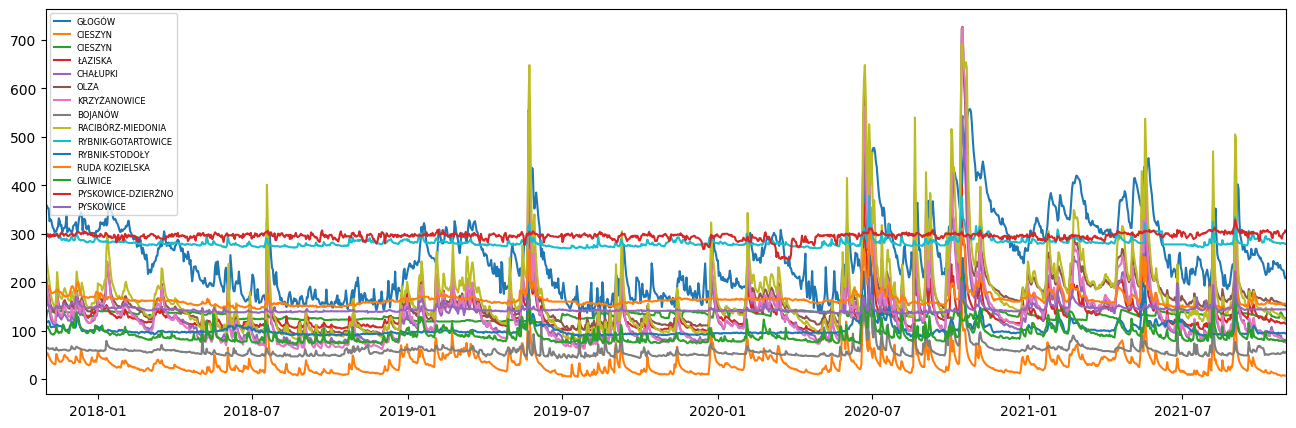

In [7]:
plt.figure(figsize=(16, 5))

for i, (_, stations) in enumerate(hierarchy.iterrows()):
    if i <= 14:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        plt.plot(dataset['Data'], dataset[water_level_col], label=stations["name_hydro"])

# decorations
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.legend(loc='upper left', prop={'size': 6})
plt.show()

River level over time for different stations. ~ Normalized by MinMaxScaler

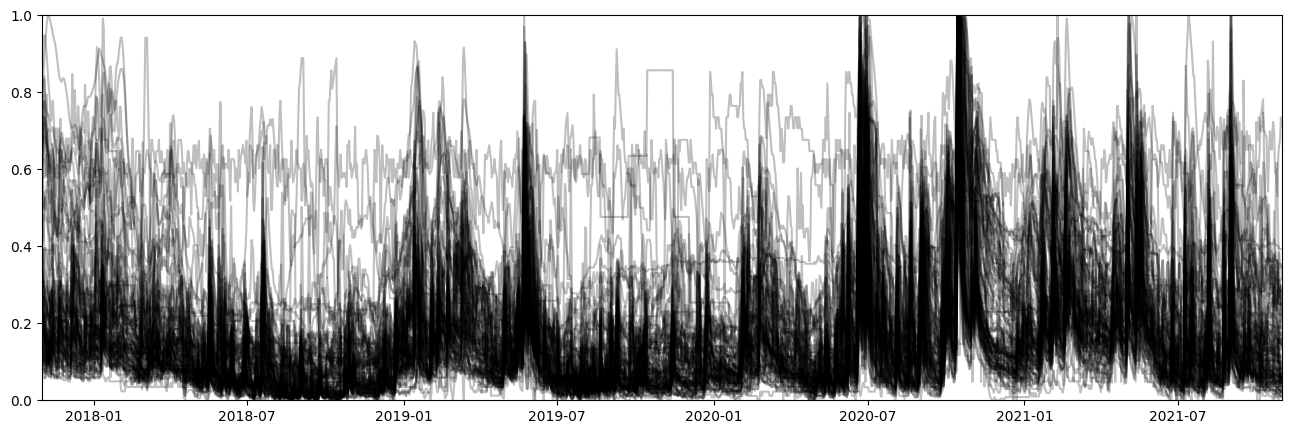

In [8]:
plt.figure(figsize=(16, 5))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    plt.plot(dataset['Data'], 
             (dataset[water_level_col] - dataset[water_level_col].min())/\
             (dataset[water_level_col].max() - dataset[water_level_col].min()), 
             label=stations["name_hydro"], color='black', alpha=0.25)

    
# decorations
plt.ylim([0, 1])
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.show()

River level over time with sum of rain for this station.

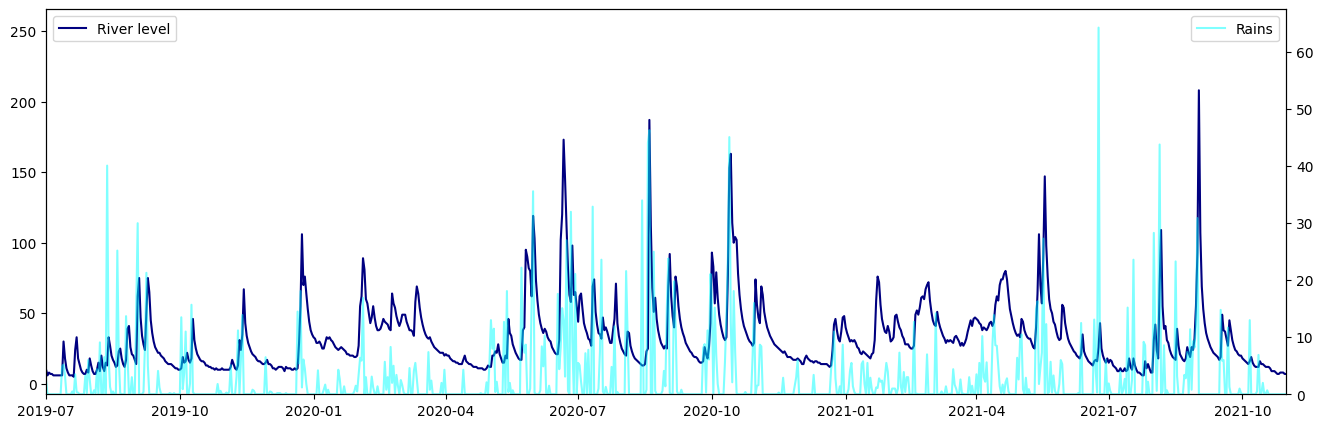

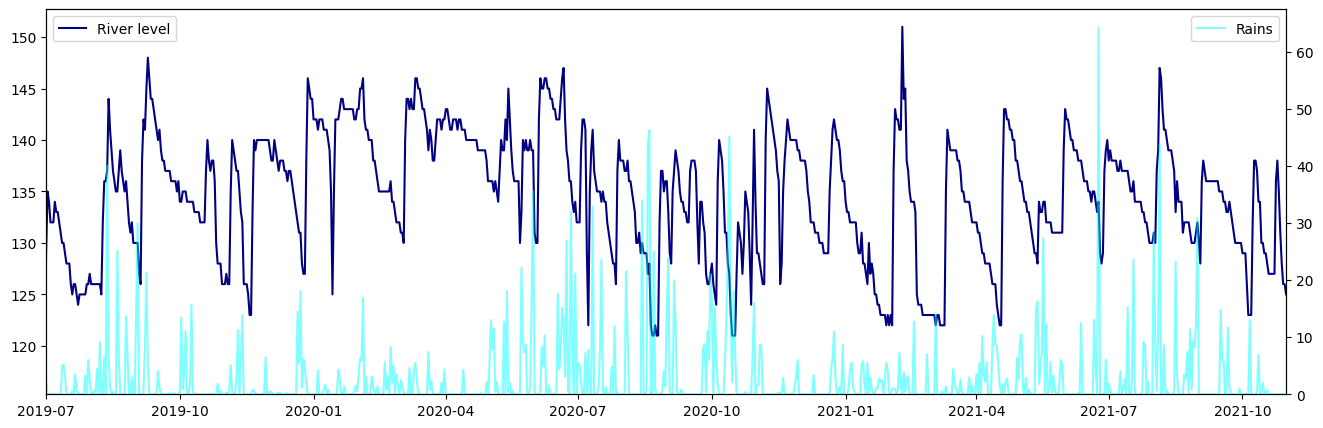

In [9]:
for i, (_, stations) in enumerate(hierarchy.iterrows()):
    if stations['id_meteo']!=0:
        if i < 3:
            fig, ax = plt.subplots(1, 1, figsize=(16, 5))
            water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
            rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)

            ax.plot(dataset['Data'], dataset[water_level_col], label='River level', color='navy')

            ax2 = ax.twinx()
            ax2.plot(dataset['Data'], dataset[rain_col], label='Rains', color='aqua', linewidth=1.5, alpha=0.5)


            # decorations
            ax.set_xlim([dataset.loc[~(pd.isnull(dataset[rain_col])), 'Data'].min(), dataset['Data'].max()])
            ax.legend(loc='upper left')

            ax2.legend(loc='upper right')
            ax2.set_ylim([0, dataset[rain_col].max()*1.05])

            plt.show()

How the river level changes in the following years.

In [10]:
dataset_years_monthly = dataset.copy()
dataset_years_monthly['Rok'] = dataset_years_monthly['Data'].dt.year
dataset_years_monthly['Miesiąc'] = [d.strftime('%b') for d in dataset_years_monthly['Data']]

dataset_years_monthly = dataset_years_monthly.drop(['Data'] + list(dataset_years_monthly.filter(regex=('Brak pomiaru')).columns),
                                                   axis=1)
dataset_years_monthly = dataset_years_monthly.groupby(['Rok', 'Miesiąc']).mean()
dataset_years_monthly.reset_index(inplace=True)


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dataset_years_monthly['Miesiąc'] = pd.Categorical(dataset_years_monthly['Miesiąc'], categories=months, ordered=True)
dataset_years_monthly.sort_values(by=['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly.reset_index(drop=True, inplace=True)

dataset_years_monthly.head(3)

,Rok,Miesiąc,BARDO (150160220) Stan wody [cm],BIAŁOBRZEZIE (150160250) Stan wody [cm],BOGDAJ (151170060) Stan wody [cm],BOGDASZOWICE (151160180) Stan wody [cm],BOJANÓW (150180040) Stan wody [cm],BORÓW (150160280) Stan wody [cm],BRANICE (150170170) Stan wody [cm],BRZEG (150170090) Stan wody [cm],...,RUDNA (251160140) Suma opadów [mm],STARE OLESNO (250180030) Suma opadów [mm],SUKOWICE (250180330) Suma opadów [mm],SZALEJÓW GÓRNY (250160840) Suma opadów [mm],SZCZAWNO-ZDRÓJ (250160130) Suma opadów [mm],TWARDOCICE (251150280) Suma opadów [mm],WALIM (250160270) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŁABĘDY (250180330) Suma opadów [mm],ŁANY (251170420) Suma opadów [mm]
0,2017,Nov,90.700000,53.466667,259.800000,89.133333,61.333333,126.500000,163.900000,198.066667,...,NaN,1.916667,0.0,1.130000,1.143333,1.433333,2.086667,NaN,0.0,NaN
1,2017,Dec,90.258065,51.774194,240.741935,89.677419,61.451613,115.870968,164.193548,198.290323,...,NaN,0.877419,0.0,0.545161,0.767742,1.216129,1.129032,NaN,0.0,NaN
2,2018,Jan,104.870968,50.935484,235.645161,98.225806,62.258065,109.064516,166.419355,200.322581,...,NaN,0.861290,0.0,1.687097,1.296774,1.429032,2.106452,NaN,0.0,NaN


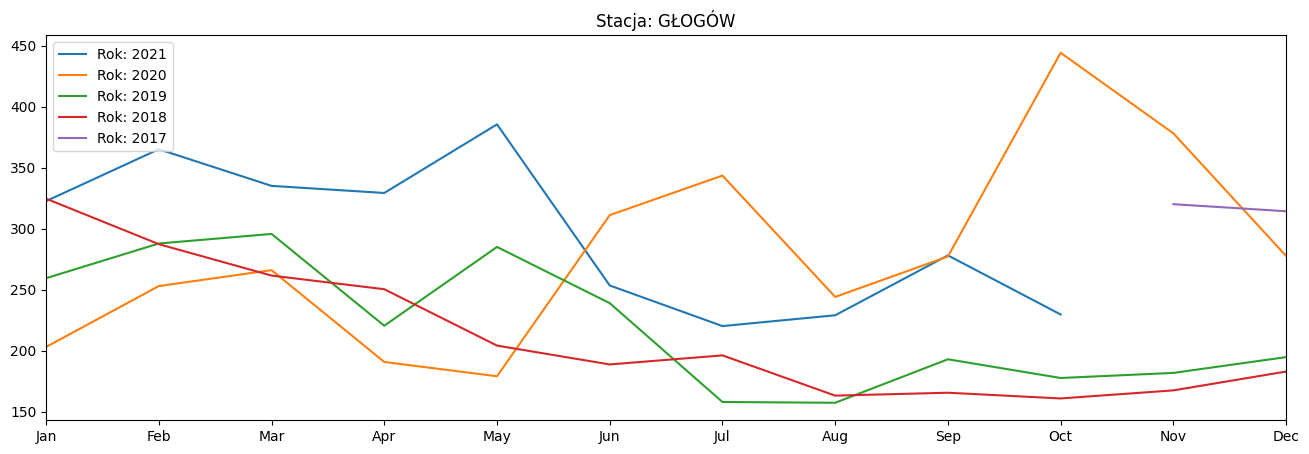

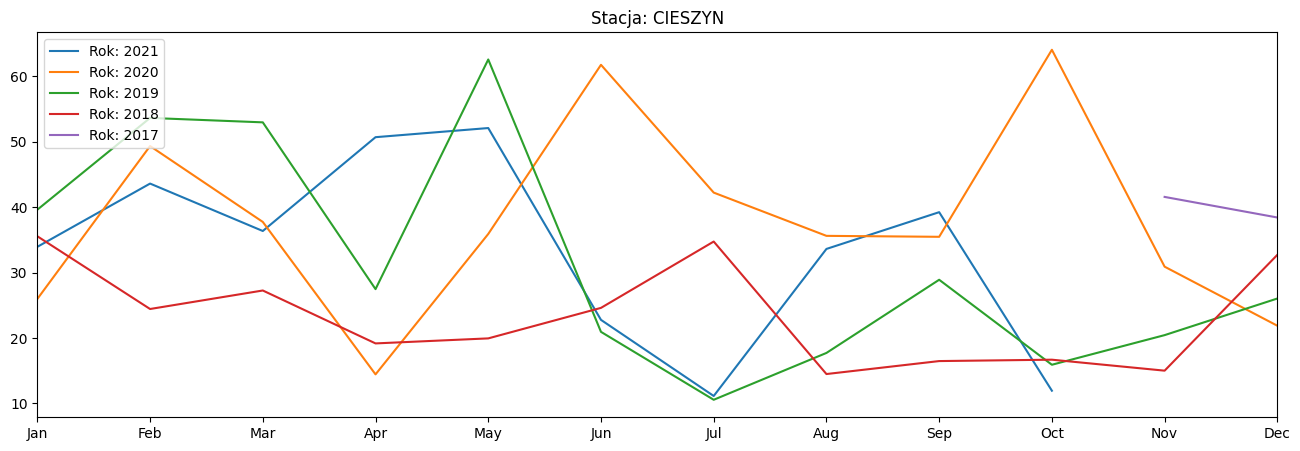

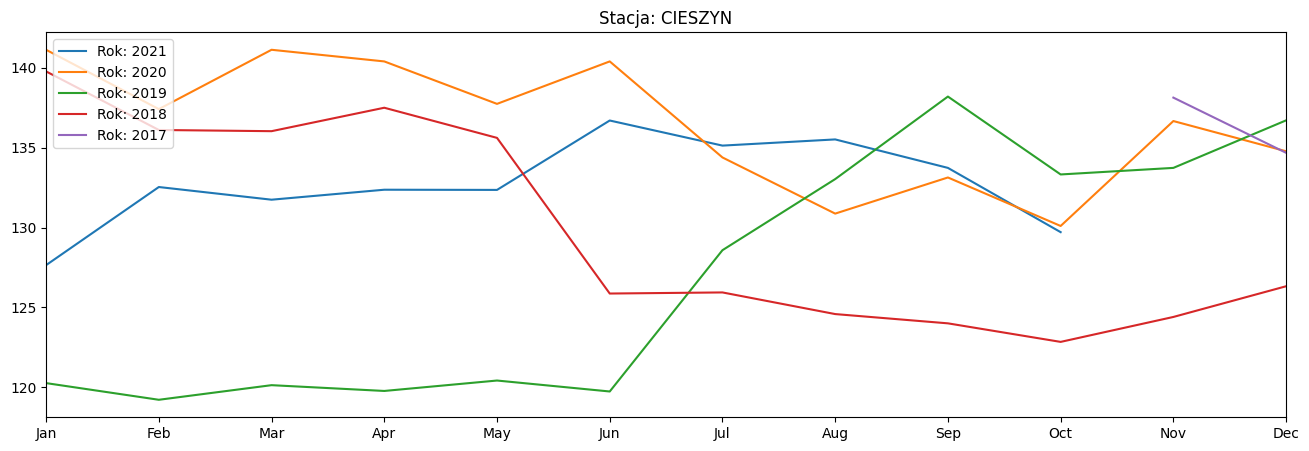

In [11]:
for i, (_, stations) in enumerate(hierarchy.iterrows()):
    if i < 3:
        plt.figure(figsize=(16, 5))

        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        for year in dataset_years_monthly['Rok'].unique()[::-1]:
            water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
            plt.plot(dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, 'Miesiąc'], 
                     dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, water_level_col], label=f'Rok: {year}')

        # decorations
        plt.title(f'Stacja: {stations["name_hydro"]}')
        plt.xlim(['Jan', 'Dec'])
        plt.legend(loc='upper left')
        plt.show()

Effect of average rain on average normalized river level

In [12]:
dataset_years_monthly_normalized = dataset_years_monthly.copy()

# Level of water
for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    dataset_years_monthly_normalized[water_level_col] = \
        (dataset_years_monthly_normalized[water_level_col] - dataset_years_monthly_normalized[water_level_col].min())/\
        (dataset_years_monthly_normalized[water_level_col].max() - dataset_years_monthly_normalized[water_level_col].min())
    
# Rain
rain_cols = dataset_years_monthly_normalized.filter(regex=("Suma opadów")).columns
dataset_years_monthly_normalized[rain_cols] = \
        (dataset_years_monthly_normalized[rain_cols] - dataset_years_monthly_normalized[rain_cols].min().min())/\
        (dataset_years_monthly_normalized[rain_cols].max().max() - dataset_years_monthly_normalized[rain_cols].min().min())

dataset_years_monthly_normalized.tail(3)

,Rok,Miesiąc,BARDO (150160220) Stan wody [cm],BIAŁOBRZEZIE (150160250) Stan wody [cm],BOGDAJ (151170060) Stan wody [cm],BOGDASZOWICE (151160180) Stan wody [cm],BOJANÓW (150180040) Stan wody [cm],BORÓW (150160280) Stan wody [cm],BRANICE (150170170) Stan wody [cm],BRZEG (150170090) Stan wody [cm],...,RUDNA (251160140) Suma opadów [mm],STARE OLESNO (250180030) Suma opadów [mm],SUKOWICE (250180330) Suma opadów [mm],SZALEJÓW GÓRNY (250160840) Suma opadów [mm],SZCZAWNO-ZDRÓJ (250160130) Suma opadów [mm],TWARDOCICE (251150280) Suma opadów [mm],WALIM (250160270) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŁABĘDY (250180330) Suma opadów [mm],ŁANY (251170420) Suma opadów [mm]
45,2021,Aug,0.216630,0.325397,0.522042,0.109639,0.176994,0.173082,0.443754,0.207588,...,0.468364,0.401591,0.0,0.254436,0.509504,0.480706,0.706344,0.449377,0.0,0.273107
46,2021,Sep,0.253666,0.354448,0.510235,0.177600,0.153559,0.236928,0.511180,0.288320,...,0.158600,0.106279,0.0,0.180837,0.128515,0.067037,0.270438,0.146828,0.0,0.063767
47,2021,Oct,0.137548,0.312004,0.460944,0.031521,0.101340,0.135681,0.459282,0.160164,...,0.073103,0.037975,0.0,0.052216,0.071520,0.173421,0.096837,0.045887,0.0,0.042722


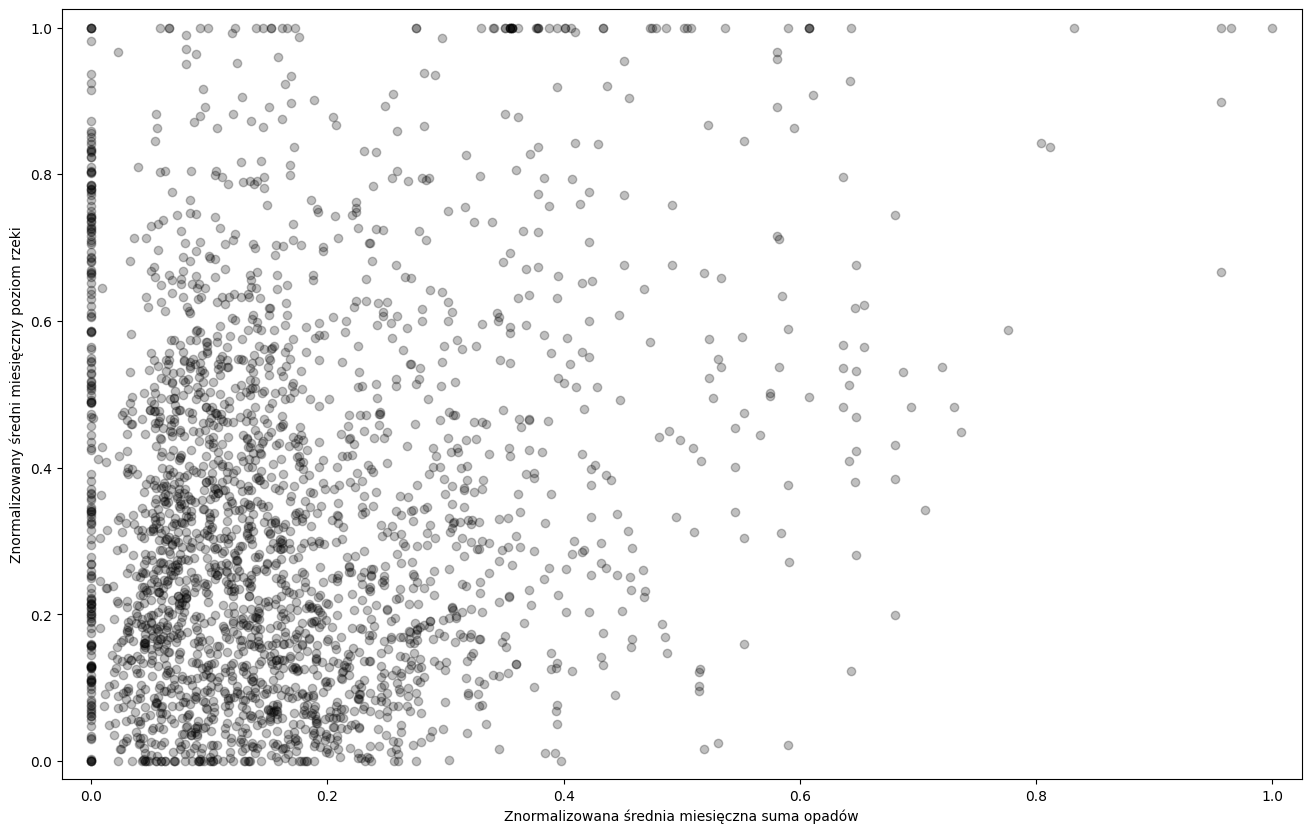

In [13]:
plt.figure(figsize=(16, 10))

for _, stations in hierarchy.iterrows():
    if stations['id_meteo']!=0:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)

        plt.scatter(dataset_years_monthly_normalized[rain_col], dataset_years_monthly_normalized[water_level_col],
                    label=f'Stacja meteo: {stations["name_meteo"]}, Stacja hydro: {stations["name_hydro"]}',
                    color='black', alpha=0.25)

    
# decorations
plt.ylim([-0.025, 1.025])
plt.xlim([-0.025, 1.025])
plt.xlabel('Znormalizowana średnia miesięczna suma opadów')
plt.ylabel('Znormalizowany średni miesięczny poziom rzeki')
plt.show()

Sezonowość / Trend

In [14]:
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized.copy()
dataset_years_monthly_normalized_combined.set_index(['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined[
                                                        dataset_years_monthly_normalized.filter(regex=("Stan wody")).columns]
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined.stack().to_frame()
dataset_years_monthly_normalized_combined.rename({0: 'Średni stan wody'}, axis=1, inplace=True)
dataset_years_monthly_normalized_combined.reset_index(inplace=True)

dataset_years_monthly_normalized_combined

,Rok,Miesiąc,level_2,Średni stan wody
0,2017,Nov,BARDO (150160220) Stan wody [cm],0.338449
1,2017,Nov,BIAŁOBRZEZIE (150160250) Stan wody [cm],0.383664
2,2017,Nov,BOGDAJ (151170060) Stan wody [cm],0.933797
3,2017,Nov,BOGDASZOWICE (151160180) Stan wody [cm],0.267763
4,2017,Nov,BOJANÓW (150180040) Stan wody [cm],0.215541
...,...,...,...,...
4267,2021,Oct,ŁAŻANY (150160090) Stan wody [cm],0.120277
4268,2021,Oct,ŁĄKI (151170040) Stan wody [cm],0.547296
4269,2021,Oct,ŚCINAWA (151160130) Stan wody [cm],0.184076
4270,2021,Oct,ŚLĘZA (151160230) Stan wody [cm],0.330370


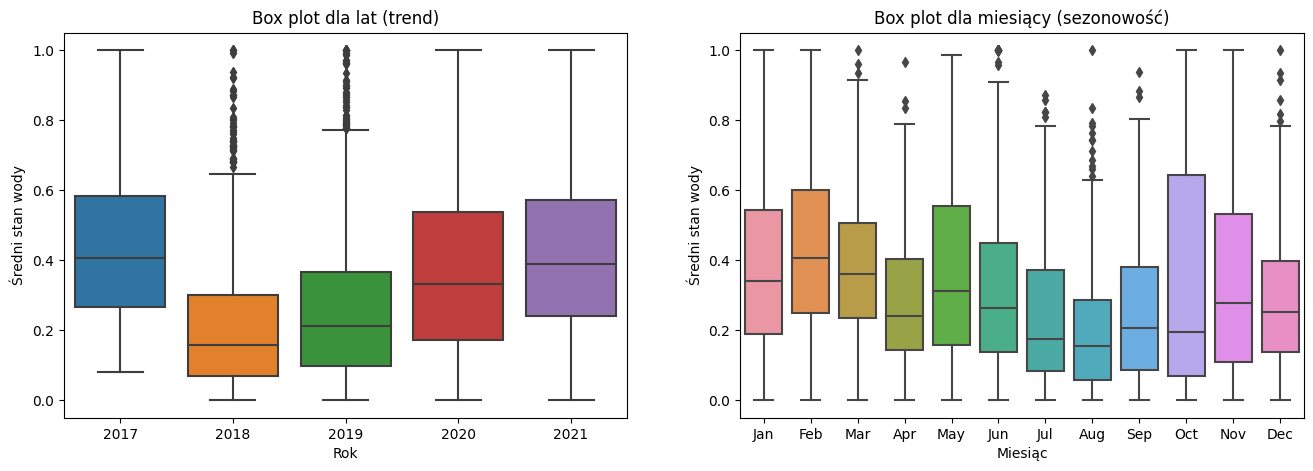

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)

sns.boxplot(x='Rok', y='Średni stan wody', data=dataset_years_monthly_normalized_combined, ax=axes[0]).set(
    xlabel='Rok', 
    ylabel='Średni stan wody'
)
axes[0].set_title('Box plot dla lat (trend)')

sns.boxplot(x='Miesiąc', y='Średni stan wody', data=dataset_years_monthly_normalized_combined, ax=axes[1]).set(
    xlabel='Miesiąc', 
    ylabel='Średni stan wody'
)
axes[1].set_title('Box plot dla miesiący (sezonowość)')

plt.show()

#### Cross-correlation ~ river levels at different stations

In [16]:
dataset_normalized = dataset.copy()

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)
    
    # Level of water
    dataset_normalized[water_level_col] = \
        (dataset_normalized[water_level_col] - dataset_normalized[water_level_col].min())/\
        (dataset_normalized[water_level_col].max() - dataset_normalized[water_level_col].min())
    if stations['id_meteo']!=0:
        # Rain
        dataset_normalized[rain_col] = \
            (dataset_normalized[rain_col] - dataset_normalized[rain_col].min())/\
            (dataset_normalized[rain_col].max() - dataset_normalized[rain_col].min())

dataset_normalized

,Data,BARDO (150160220) Stan wody [cm],BIAŁOBRZEZIE (150160250) Stan wody [cm],BOGDAJ (151170060) Stan wody [cm],BOGDASZOWICE (151160180) Stan wody [cm],BOJANÓW (150180040) Stan wody [cm],BORÓW (150160280) Stan wody [cm],BRANICE (150170170) Stan wody [cm],BRZEG (150170090) Stan wody [cm],BRZEG DOLNY (151160170) Stan wody [cm],...,RUDNA (251160140) Brak pomiaru,STARE OLESNO (250180030) Brak pomiaru,SUKOWICE (250180330) Brak pomiaru,SZALEJÓW GÓRNY (250160840) Brak pomiaru,SZCZAWNO-ZDRÓJ (250160130) Brak pomiaru,TWARDOCICE (251150280) Brak pomiaru,WALIM (250160270) Brak pomiaru,ZIELINA (250170280) Brak pomiaru,ŁABĘDY (250180330) Brak pomiaru,ŁANY (251170420) Brak pomiaru
0,2017-11-01,0.210046,0.172043,0.798611,0.129213,0.101449,0.364407,0.201646,0.259184,0.347305,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2017-11-02,0.187215,0.161290,0.756944,0.117978,0.101449,0.330508,0.201646,0.234694,0.345808,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017-11-03,0.178082,0.155914,0.791667,0.106742,0.106280,0.305085,0.213992,0.204082,0.305389,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2017-11-04,0.164384,0.161290,0.833333,0.101124,0.096618,0.292373,0.185185,0.208163,0.245509,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2017-11-05,0.155251,0.150538,0.798611,0.101124,0.091787,0.279661,0.172840,0.185714,0.284431,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-10-27,0.059361,0.134409,0.298611,0.016854,0.057971,0.080508,0.176955,0.104082,0.401198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2021-10-28,0.059361,0.134409,0.312500,0.016854,0.067633,0.080508,0.176955,0.093878,0.393713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,2021-10-29,0.059361,0.134409,0.298611,0.016854,0.053140,0.076271,0.176955,0.093878,0.393713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,2021-10-30,0.054795,0.145161,0.270833,0.011236,0.057971,0.080508,0.176955,0.091837,0.392216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pearson correlation

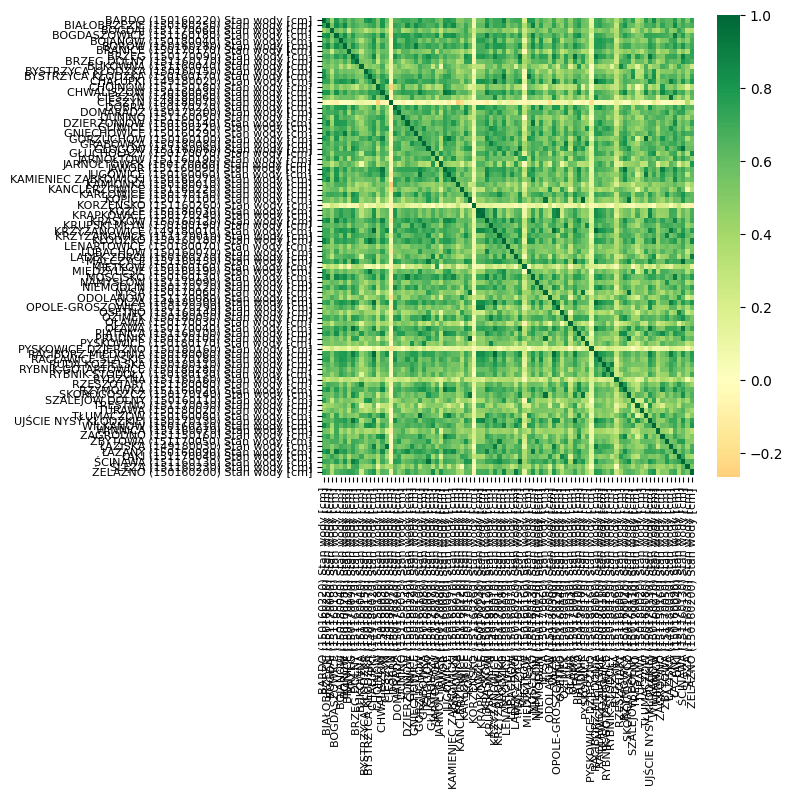

In [17]:
# Plot
plt.figure(figsize=(6, 6))
ax = sns.heatmap(dataset_normalized[dataset_normalized.filter(regex=('Stan wody')).columns].corr(), 
                 xticklabels=dataset_normalized[dataset_normalized.filter(regex=('Stan wody')).columns].corr().columns, 
                 yticklabels=dataset_normalized[dataset_normalized.filter(regex=('Stan wody')).columns].corr().columns, 
                 cmap='RdYlGn', 
                 center=0)

# Decorations
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Time Lagged Cross Correlation

In [18]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [19]:
dataset_normalized.head(3)

,Data,BARDO (150160220) Stan wody [cm],BIAŁOBRZEZIE (150160250) Stan wody [cm],BOGDAJ (151170060) Stan wody [cm],BOGDASZOWICE (151160180) Stan wody [cm],BOJANÓW (150180040) Stan wody [cm],BORÓW (150160280) Stan wody [cm],BRANICE (150170170) Stan wody [cm],BRZEG (150170090) Stan wody [cm],BRZEG DOLNY (151160170) Stan wody [cm],...,RUDNA (251160140) Brak pomiaru,STARE OLESNO (250180030) Brak pomiaru,SUKOWICE (250180330) Brak pomiaru,SZALEJÓW GÓRNY (250160840) Brak pomiaru,SZCZAWNO-ZDRÓJ (250160130) Brak pomiaru,TWARDOCICE (251150280) Brak pomiaru,WALIM (250160270) Brak pomiaru,ZIELINA (250170280) Brak pomiaru,ŁABĘDY (250180330) Brak pomiaru,ŁANY (251170420) Brak pomiaru
0,2017-11-01,0.210046,0.172043,0.798611,0.129213,0.101449,0.364407,0.201646,0.259184,0.347305,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2017-11-02,0.187215,0.161290,0.756944,0.117978,0.101449,0.330508,0.201646,0.234694,0.345808,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017-11-03,0.178082,0.155914,0.791667,0.106742,0.106280,0.305085,0.213992,0.204082,0.305389,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


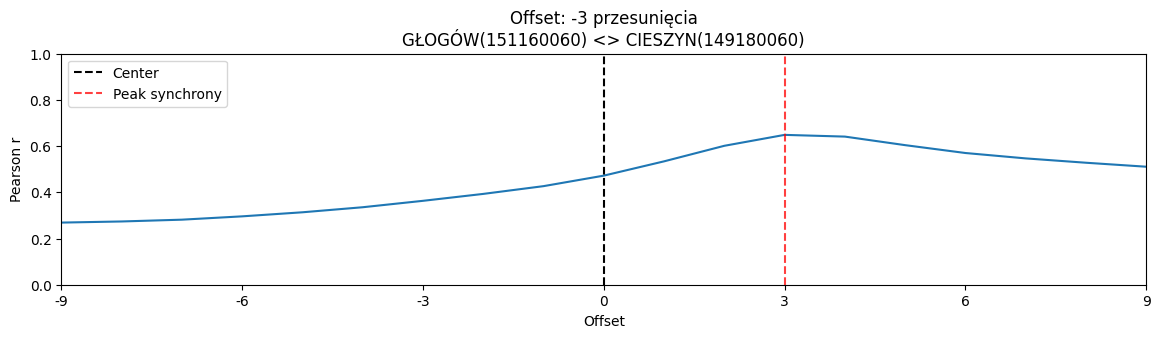

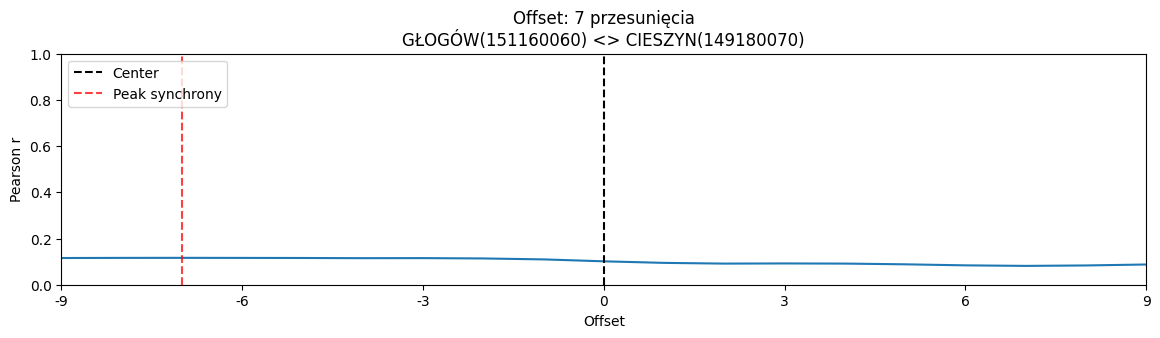

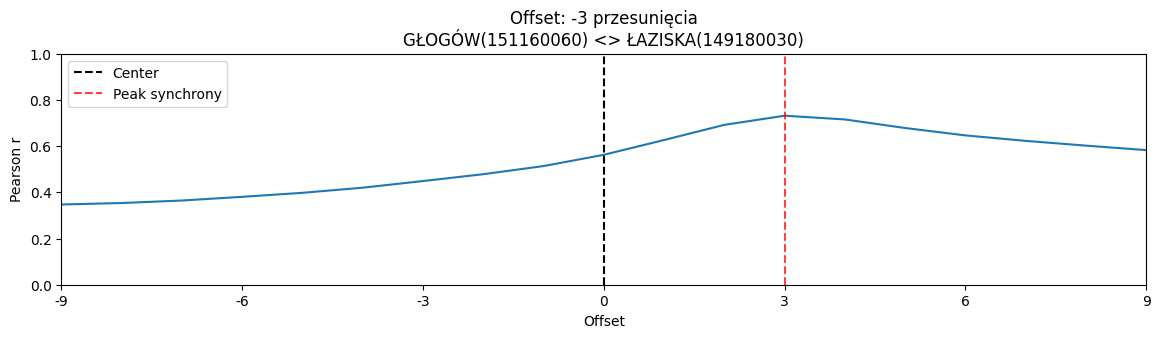

In [94]:
time_lagged_cross_correlation_to_show = 3

time_lagged_cross_correlation = pd.DataFrame({'pierwsza_stacja': [], 'druga_stacja': [], 'lag': [], 
                                              'corr': [], 'arg_corr': [], 'max_corr': []})

hydro_stations = list(hierarchy.index)

for i, (first_station, second_station) in enumerate(combinations(hydro_stations, 2)):
        first_water_level_col = create_col_name(hierarchy.loc[first_station, "id_hydro"], 
                                                hierarchy.loc[first_station, "name_hydro"],
                                                water_level_suffix)
        first_station_name = hierarchy.loc[first_station, "name_hydro"] + f'({hierarchy.loc[first_station, "id_hydro"]})'
        second_water_level_col = create_col_name(hierarchy.loc[second_station, "id_hydro"], 
                                                 hierarchy.loc[second_station, "name_hydro"],
                                                 water_level_suffix)
        second_station_name = hierarchy.loc[second_station, "name_hydro"] + f'({hierarchy.loc[second_station, "id_hydro"]})'
        if first_station_name == 'GŁOGÓW(151160060)':
            d1 = dataset_normalized[first_water_level_col].copy()
            d2 = dataset_normalized[second_water_level_col].copy()
            rs = [crosscorr(d1, d2, lag) for lag in range(-int(9),int(9+1))]
            offset = int(np.floor(len(rs)/2)-np.argmax(rs))
            # Attaching data to a DataFrame
            d1_d2_station = pd.DataFrame()
            d1_d2_station['lag'] = range(-int(9),int(9+1))
            d1_d2_station['pierwsza_stacja'] = first_station_name
            d1_d2_station['druga_stacja'] = second_station_name
            d1_d2_station['corr'] = rs
            d1_d2_station['arg_corr'] = offset
            d1_d2_station['max_corr'] = np.max(rs)
            time_lagged_cross_correlation = pd.concat([time_lagged_cross_correlation, d1_d2_station], axis=0)
            if i < time_lagged_cross_correlation_to_show:
                fig, ax=plt.subplots(figsize=(14,3))
                ax.plot(rs)
                ax.axvline(np.floor(len(rs)/2), color='k',linestyle='--', label='Center')
                ax.axvline(np.argmax(rs), color='r',linestyle='--', label='Peak synchrony', alpha=0.75)
                ax.set(title=f'Offset: {offset} przesunięcia\n{first_station_name} <> {second_station_name}',
                       xlabel='Offset',ylabel='Pearson r')
                ax.set_xticks([0, 3, 6, 9, 12, 15, 18])
                ax.set_xlim([0, 18])
                ax.set_ylim([0, 1])
                ax.set_xticklabels([-9, -6, -3, 0, 3, 6, 9])

                plt.legend(loc='upper left')
                plt.show()

In [95]:
time_lagged_cross_correlation_glogow = time_lagged_cross_correlation.copy()
time_lagged_cross_correlation_glogow = time_lagged_cross_correlation_glogow.loc[
    time_lagged_cross_correlation_glogow['pierwsza_stacja']=='GŁOGÓW(151160060)', :]

# given information about abs_arg_corr
time_lagged_cross_correlation_glogow['abs_arg_corr'] = np.abs(time_lagged_cross_correlation_glogow['arg_corr'])

time_lagged_cross_correlation_glogow.sort_values(by=['abs_arg_corr', 'max_corr', 'druga_stacja'],
                                                 ascending=[True, True, False], 
                                                 inplace=True)
time_lagged_cross_correlation_glogow['lag'] = time_lagged_cross_correlation_glogow['lag'].astype(int)

time_lagged_cross_correlation_glogow_pivot = time_lagged_cross_correlation_glogow.pivot(index='druga_stacja', columns=['lag'],
                                                                                        values='corr')
time_lagged_cross_correlation_glogow_pivot = pd.merge(time_lagged_cross_correlation_glogow_pivot.reset_index(), 
                                                      time_lagged_cross_correlation_glogow[['druga_stacja', 'abs_arg_corr', 
                                                                                            'max_corr']].drop_duplicates(), 
                                                      how='left', on=['druga_stacja'])

time_lagged_cross_correlation_glogow_pivot.sort_values(by=['max_corr', 'abs_arg_corr', 'druga_stacja'],
                                                       ascending=[False, True, True], inplace=True)
time_lagged_cross_correlation_glogow_pivot.set_index(['druga_stacja'], inplace=True)
time_lagged_cross_correlation_glogow_pivot.drop(['abs_arg_corr', 'max_corr'], axis=1, inplace=True)

time_lagged_cross_correlation_glogow_pivot

,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9
druga_stacja,,,,,,,,,,,,,,,,,,,
ŚCINAWA(151160130),0.731761,0.749893,0.770556,0.791878,0.813656,0.834853,0.859741,0.886890,0.918531,0.957999,0.989096,0.965607,0.929712,0.901438,0.877234,0.854079,0.833765,0.812828,0.792058
MALCZYCE(151160150),0.682055,0.700460,0.721810,0.744201,0.769056,0.793909,0.820330,0.849793,0.882313,0.921711,0.965397,0.958732,0.921657,0.889889,0.864200,0.840131,0.817613,0.794926,0.773745
OŁAWA(150170040),0.589242,0.608231,0.628859,0.650692,0.676355,0.705189,0.734864,0.767626,0.805848,0.848437,0.888422,0.902913,0.878610,0.843535,0.811938,0.784309,0.758221,0.733770,0.710107
BRZEG(150170090),0.577652,0.595483,0.615629,0.636826,0.661693,0.689803,0.718934,0.750335,0.786222,0.827461,0.867417,0.886408,0.868956,0.838106,0.809533,0.784558,0.760709,0.737430,0.714499
KRZYŻANOWICE(151170010),0.675606,0.695857,0.716489,0.736763,0.756667,0.775277,0.792523,0.809014,0.825395,0.840150,0.851308,0.854848,0.850681,0.839769,0.825730,0.810466,0.796348,0.783808,0.771917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RYDZYNA(151160160),0.280026,0.288930,0.301294,0.316062,0.328929,0.338794,0.348896,0.361278,0.375720,0.388740,0.397408,0.401388,0.400777,0.394154,0.385456,0.377284,0.368796,0.361384,0.353661
OŁAWA(150170030),0.142057,0.150616,0.156954,0.165458,0.179380,0.191733,0.207828,0.231627,0.262405,0.299759,0.340024,0.372435,0.387045,0.384250,0.374142,0.362069,0.349991,0.337865,0.325186
PYSKOWICE-DZIERŻNO(150180160),0.042312,0.051499,0.061370,0.071725,0.081863,0.094633,0.104875,0.112134,0.123093,0.137389,0.150984,0.164247,0.173797,0.174047,0.166131,0.158046,0.150768,0.145268,0.139965


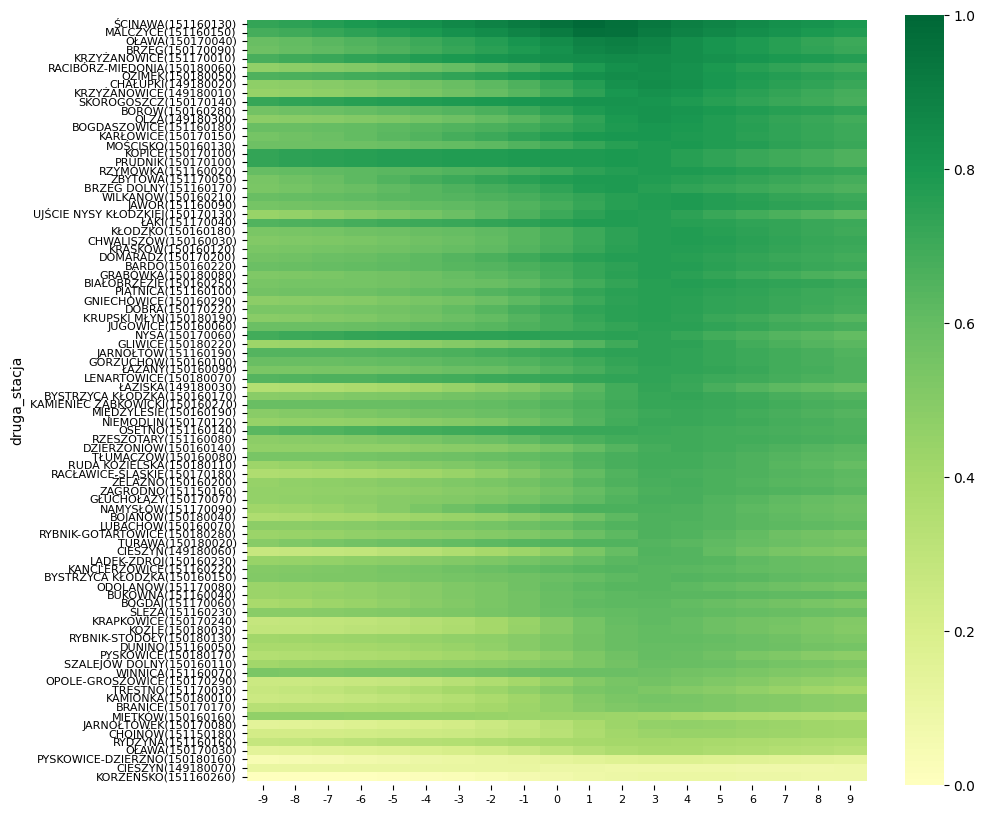

In [104]:
# Plot
plt.figure(figsize=(10, 10))
ax = sns.heatmap(time_lagged_cross_correlation_glogow_pivot, 
                 cmap='RdYlGn', 
                 yticklabels=time_lagged_cross_correlation_glogow_pivot.index,
                 center=0, vmin=0, vmax=1)
# ax.axvline(9.5, color='k',linestyle='--', linewidth=1)

# Decorations
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Windowed Time Lagged Cross Correlations 

In [ ]:
dataset_normalized

In [ ]:
# Windowed time lagged cross correlation
# no_splits = 20
# samples_per_split = dataset_normalized.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = df['G£OGÓW (151160060) Stan wody [cm]'].loc[(t)*samples_per_split:(t+1)*samples_per_split].copy()
#     d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split].copy()
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = df['S1_Joy'].iloc[t_start:t_end]
#     d2 = df['S2_Joy'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

Cross-correlation ~ poziomy rzeki w stacji a przeszłe opady.

Porównanie wpływu skorelowanej rzeki oraz opadów.

INNE ZMIENNE? Exploratory time series different.